# Motion analyzer

August 11, 2018

In [26]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sg
import serial
import time

matplotlib.rcParams['figure.figsize'] = [16, 5]

SAMPLING_RATE = 80.0
GYRO_RESOLUTION = 250.0 / 32768.0
ACCEL_RESOLUTION = 2.0 / 32768.0
RAW_DATA_FILE = './raw_data.csv'
PORT = 'COM14'

## Dump raw data from the board to the file

In [27]:
ser = serial.Serial(PORT, 115200)
ser.write(b'd')
with open(RAW_DATA_FILE, 'w') as f:
    while True:
        line = ser.readline().decode('ascii')
        if line == '\n':
            break
        f.write(line)
ser.close()

In [28]:
df = pd.read_csv(RAW_DATA_FILE, dtype=np.int16)

gres = lambda v: v * GYRO_RESOLUTION
ares = lambda v: v * ACCEL_RESOLUTION
to_time = lambda v: v / SAMPLING_RATE
df[['gx', 'gy', 'gz']] = df[['gx', 'gy', 'gz']].apply(gres)
df[['ax', 'ay', 'az']] = df[['ax', 'ay', 'az']].apply(ares)
df[['cnt']] = df[['cnt']].apply(to_time)
df.set_index('cnt', drop=True, inplace=True)
df.tail()

,id,gx,gy,gz,ax,ay,az,pls
cnt,,,,,,,,
19.4375,1,-4.043579,33.264160,80.459595,1.101135,-0.419556,1.272400,144
19.4500,1,2.761841,28.076172,48.339844,1.030457,-0.606689,1.234070,144
19.4625,1,2.395630,-11.260986,-21.163940,0.299316,-0.367004,1.208496,144
19.4750,1,26.824951,-5.889893,-61.721802,0.025879,-0.084351,1.168152,144
19.4875,1,25.451660,-31.707764,-46.493530,-0.021240,0.051270,1.086487,144


Text(0,0.5,'Acceleration in G')

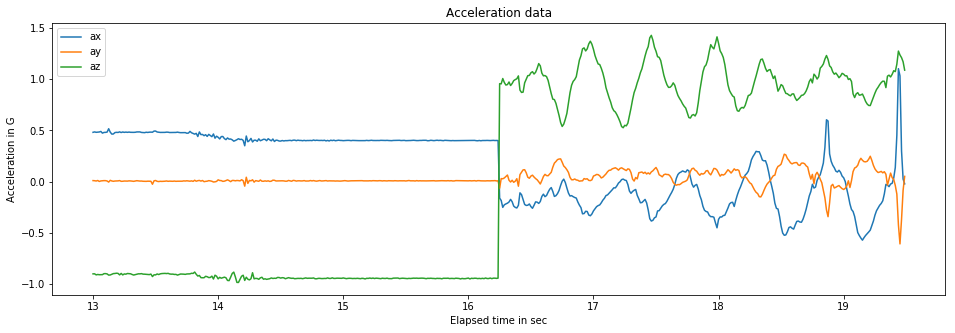

In [29]:
ax_a = df[['ax', 'ay', 'az']].plot(title='Acceleration data')
ax_a.set_xlabel('Elapsed time in sec')
ax_a.set_ylabel('Acceleration in G')

In [30]:
CUTOFF = 5.0
b, a = sg.butter(5, CUTOFF/SAMPLING_RATE, btype='low')
df[['ax', 'ay', 'az']] = df[['ax', 'ay', 'az']].apply(lambda row: sg.lfilter(b, a, row))

Text(0,0.5,'Acceleration in G')

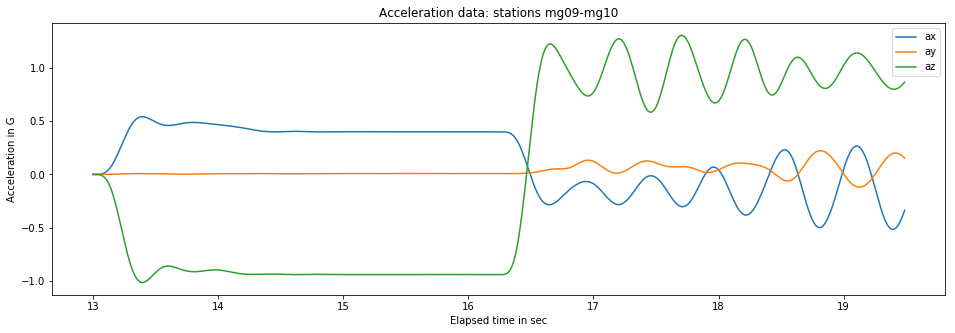

In [31]:
ax_a = df[['ax', 'ay', 'az']].plot(title='Acceleration data: stations mg09-mg10')
ax_a.set_xlabel('Elapsed time in sec')
ax_a.set_ylabel('Acceleration in G')

Text(0,0.5,'Angular velocity in dps')

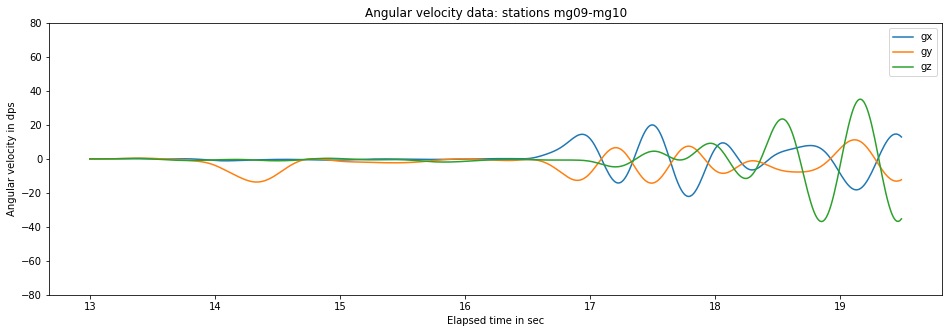

In [35]:
ax_g = df[['gx', 'gy', 'gz']].plot(ylim=[-80, 80], title='Angular velocity data: stations mg09-mg10')
ax_g.set_xlabel('Elapsed time in sec')
ax_g.set_ylabel('Angular velocity in dps')

In [36]:
CUTOFF = 3.0
b, a = sg.butter(5, CUTOFF/SAMPLING_RATE, btype='low')
df[['gx', 'gy', 'gz']] = df[['gx', 'gy', 'gz']].apply(lambda row: sg.lfilter(b, a, row))

Text(0,0.5,'Angular velocity in dps')

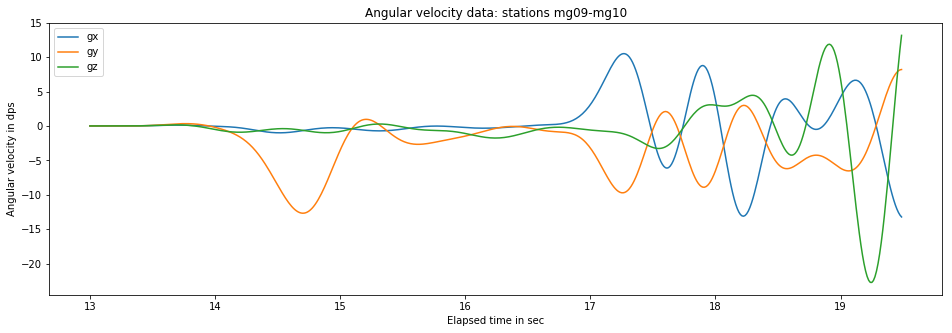

In [37]:
ax_g = df[['gx', 'gy', 'gz']].plot(title='Angular velocity data: stations mg09-mg10')
ax_g.set_xlabel('Elapsed time in sec')
ax_g.set_ylabel('Angular velocity in dps')